# AIBE Project
_Benet Fité, Jon Lecumberri and Oriol Bustos_

## Table of contents

In [1]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import *
from sklearn.decomposition import PCA

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Concatenate, Embedding, Flatten
from tensorflow.keras.utils import plot_model
from keras.optimizers import Adam,RMSprop

- [Imports and loading](#0-imports-and-data-loading)
- [EDA clustering](#1-eda-clustering)
- [Dimensionality reduction](#2-dimensionality-reduction--feature-extraction)
- [Classification](#3-classification-via-diverse-algorithms)

## 0. Imports and data loading

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
# Load your dataset
data = pd.read_csv('..\data\heart_data_processed.csv')
data = data.drop('Unnamed: 0', axis=1)
# Process gender
data['gender_encoded'] = data['gender'].map({'M': 1, 'F': 0})
data = data.drop('gender', axis=1)

data.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,gender_encoded
0,50.39,168,62.0,110,80,1,1,0,0,1,0,36.90,1
1,55.42,156,85.0,140,90,3,1,0,0,1,1,54.49,0
2,51.66,165,64.0,130,70,3,1,0,0,0,1,38.79,0
3,48.28,169,82.0,150,100,1,1,0,0,1,1,48.52,1
4,47.87,156,56.0,100,60,1,1,0,0,0,0,35.90,0


In [4]:
# Splitting the dataset into features and target variable
X = data.drop('cardio', axis=1)  # Features
y = data['cardio']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Standardizing the features (PCA is sensitive to scale)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 1. EDA: Clustering

podem fer k-means, dbscan, yoqse

Silhouette score is a measure of how well-separated the clusters are in a clustering algorithm, goes from -1 to +1


c:\Users\bfite\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bfite\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bfite\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\bfite\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\clus

Silhouette scores for different cluster sizes:
Cluster size: 2, Silhouette score: 0.17997557222247731
Cluster size: 3, Silhouette score: 0.1901090025522445
Cluster size: 4, Silhouette score: 0.18147353636632818
Cluster size: 5, Silhouette score: 0.16721251711767987
Cluster size: 6, Silhouette score: 0.18199088339010888
Cluster size: 7, Silhouette score: 0.18535117240592366
Cluster size: 8, Silhouette score: 0.18299957921907345
Cluster size: 9, Silhouette score: 0.14701156569363888
Cluster size: 10, Silhouette score: 0.1502278521691767


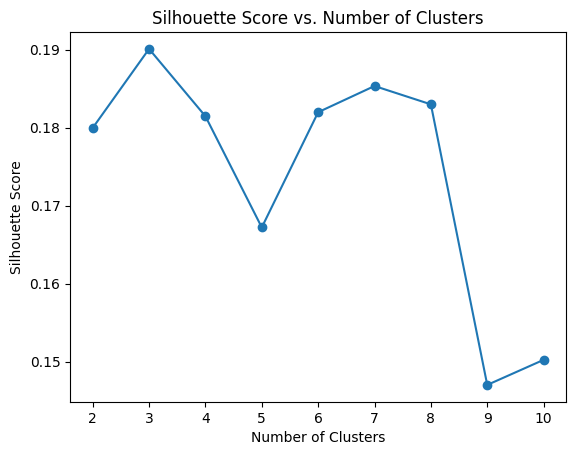

In [5]:
cluster_sizes = range(2, 11)
silhouette_scores = {}

for size in cluster_sizes:
    kmeans = KMeans(n_clusters=size, random_state=69)
    kmeans.fit(X_scaled)
    labels = kmeans.labels_
    silhouette_scores[size] = silhouette_score(X_scaled, labels)


# prints and plots
print("Silhouette scores for different cluster sizes:")
for size, score in silhouette_scores.items():
    print(f"Cluster size: {size}, Silhouette score: {score}")

plt.plot(list(silhouette_scores.keys()), list(silhouette_scores.values()), marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=5, random_state=69)
kmeans.fit(X_scaled)
cluster_labels = kmeans.labels_

data['cluster'] = cluster_labels

print(data['cluster'].value_counts())

c:\Users\bfite\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


cluster
1    27746
0    14845
2    13865
3     6079
4     5744
Name: count, dtype: int64


In [7]:
data.to_csv('data_clustered.csv', index = False)
data.head()

,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,gender_encoded,cluster
0,50.39,168,62.0,110,80,1,1,0,0,1,0,36.90,1,0
1,55.42,156,85.0,140,90,3,1,0,0,1,1,54.49,0,2
2,51.66,165,64.0,130,70,3,1,0,0,0,1,38.79,0,1
3,48.28,169,82.0,150,100,1,1,0,0,1,1,48.52,1,2
4,47.87,156,56.0,100,60,1,1,0,0,0,0,35.90,0,1


In [ ]:
# Run to reload the clustered dataset
data = pd.read_csv('data_clustered.csv')

In [11]:
# Importing pandas library
import pandas as pd

# Assuming your data is stored in a DataFrame called 'data'

# Define continuous and categorical columns
continuous_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
categorical_cols = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'gender_encoded']

# Group by 'cluster' and compute the required statistics
cluster_stats = data.groupby('cluster').agg(
    cardio_1_count=('cardio', lambda x: (x == 1).sum()),
    cardio_0_count=('cardio', lambda x: (x == 0).sum()),
    age_mean=('age', 'mean'),
    age_std=('age', 'std'),
    height_mean=('height', 'mean'),
    height_std=('height', 'std'),
    weight_mean=('weight', 'mean'),
    weight_std=('weight', 'std'),
    ap_hi_mean=('ap_hi', 'mean'),
    ap_hi_std=('ap_hi', 'std'),
    ap_lo_mean=('ap_lo', 'mean'),
    ap_lo_std=('ap_lo', 'std')
)

# Add percentage of cardio_1 and cardio_0
cluster_stats['cardio_1_percentage'] = (cluster_stats['cardio_1_count'] / (cluster_stats['cardio_1_count'] + cluster_stats['cardio_0_count'])) * 100
cluster_stats['cardio_0_percentage'] = (cluster_stats['cardio_0_count'] / (cluster_stats['cardio_1_count'] + cluster_stats['cardio_0_count'])) * 100

# Calculate frequency tables for categorical variables
for col in categorical_cols:
    frequency_table = data.groupby('cluster')[col].value_counts(normalize=True).unstack().add_prefix(f'{col}_')
    cluster_stats = pd.concat([cluster_stats, frequency_table], axis=1)



,cardio_1_count,cardio_0_count,age_mean,age_std,height_mean,height_std,weight_mean,weight_std,ap_hi_mean,ap_hi_std,...,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1,gender_encoded_0,gender_encoded_1
cluster,,,,,,,,,,,,,,,,,,,,,
0,6779,8066,52.802226,6.979919,170.532098,6.451068,74.756484,10.892416,124.500438,12.722536,...,0.051465,0.000404,1.000000,NaN,0.956618,0.043382,0.208825,0.791175,0.020546,0.979454
1,10244,17502,52.340982,6.706876,161.432062,6.426199,66.121063,8.704003,119.158834,12.045255,...,0.044763,0.000649,0.998703,0.001297,0.983385,0.016615,0.194587,0.805413,0.985223,0.014777
2,10318,3547,55.279244,6.205087,162.421204,7.323723,87.710691,14.826267,141.684097,17.274498,...,0.098666,0.003678,0.995961,0.004039,0.961197,0.038803,0.196105,0.803895,0.840606,0.159394
3,3854,2225,55.819474,5.937363,163.509294,7.579883,76.868268,14.027343,130.341833,15.767059,...,0.189669,0.810331,0.968909,0.031091,0.965290,0.034710,0.210561,0.789439,0.732357,0.267643
4,2645,3099,52.151931,6.844894,169.652507,7.144858,76.897545,14.035495,127.818593,17.074281,...,0.088614,0.034819,NaN,1.000000,0.685411,0.314589,0.162604,0.837396,0.111943,0.888057


## 2. Dimensionality reduction / feature extraction

autoencoders poden aprendre les variables mes important en un latent space, desfent i refent les dades.
sino pca's i tal

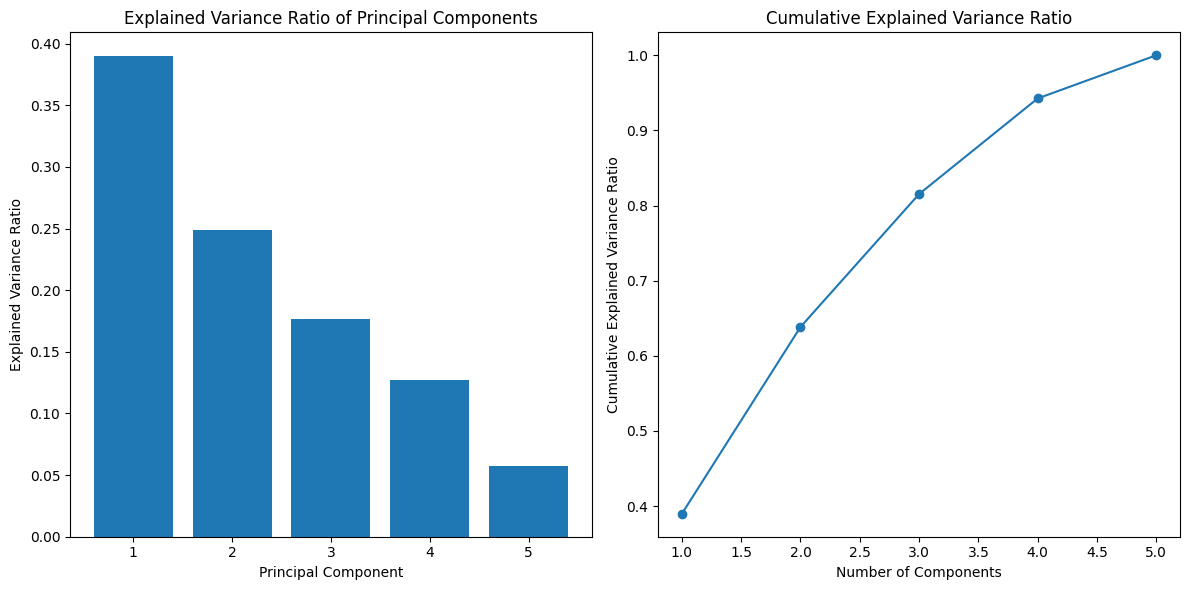

In [14]:
##Perform PCA only on continuous variables
pca = PCA()
scaler_all = StandardScaler()
X_scaled = scaler_all.fit_transform(X[['age','height','weight','ap_hi','ap_lo']])
X_pca = pca.fit_transform(X_scaled)

# Plot explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)
num_components = len(explained_variance_ratio)

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot explained variance ratio
axs[0].bar(range(1, num_components + 1), explained_variance_ratio)
axs[0].set_xlabel('Principal Component')
axs[0].set_ylabel('Explained Variance Ratio')
axs[0].set_title('Explained Variance Ratio of Principal Components')

# Plot cumulative explained variance
axs[1].plot(range(1, num_components + 1), cumulative_explained_variance, marker='o', linestyle='-')
axs[1].set_xlabel('Number of Components')
axs[1].set_ylabel('Cumulative Explained Variance Ratio')
axs[1].set_title('Cumulative Explained Variance Ratio')

plt.tight_layout()
plt.show()


In [ ]:
# Retain 3 principal components
n_components = 3
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the principal components
PC_df = pd.DataFrame(data=X_pca, columns=[f'PC{i+1}' for i in range(n_components)])

# Display the reduced dataset
print(PC_df.head())
print(PC_df.shape)


        PC1       PC2       PC3
0 -0.404303  1.211144  0.732489
1 -1.476163 -0.178737  0.137788
2 -1.698153 -0.456099  0.232916
3  2.698052  1.197845 -2.864887
4 -1.846403  0.475138  0.103402
(68181, 3)


## 3. Classification via diverse algorithms

In [36]:
# Initialize and fit Lasso regression model
lasso = Lasso(alpha=0.01)  # You can adjust alpha (regularization parameter) as needed
lasso.fit(X_train_scaled, y_train)

# Predictions
y_pred = lasso.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

# Optionally, you can also get the coefficients of the model
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
print(coefficients)

Mean Squared Error: 0.22069683707065277
R^2 Score: 0.11720125404455328
           Feature  Coefficient
0              age     0.090136
1           height    -0.000000
2           weight     0.031175
3            ap_hi     0.010163
4            ap_lo     0.014019
5      cholesterol     0.077052
6             gluc    -0.000000
7            smoke    -0.000000
8             alco    -0.000000
9           active    -0.007220
10             BMI     0.035771
11  gender_encoded     0.000000


Accuracy: 0.7194397594778911

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.76      0.73      6843
           1       0.74      0.68      0.71      6794

    accuracy                           0.72     13637
   macro avg       0.72      0.72      0.72     13637
weighted avg       0.72      0.72      0.72     13637


Confusion Matrix:
[[5209 1634]
 [2192 4602]]


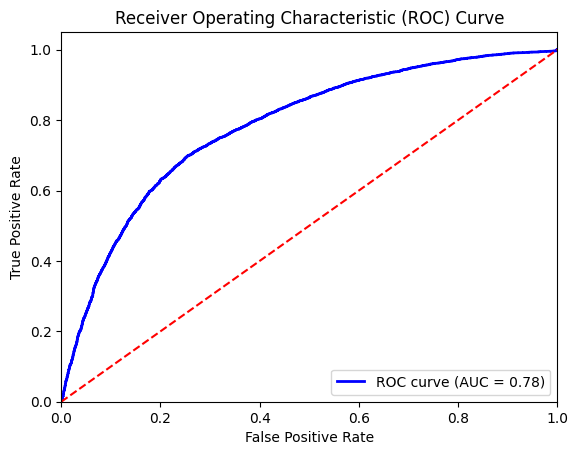

In [39]:
# Create and fit the logistic regression model
logistic_model = LogisticRegression()
logistic_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = logistic_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Compute predicted probabilities
y_prob = logistic_model.predict_proba(X_test_scaled)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = roc_auc_score(y_test, y_prob)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [41]:
# Create and fit the KNN classifier
k = 5  # Number of neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)
knn_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.645229889271834

Classification Report:
              precision    recall  f1-score   support

           0       0.64      0.66      0.65      6843
           1       0.65      0.63      0.64      6794

    accuracy                           0.65     13637
   macro avg       0.65      0.65      0.65     13637
weighted avg       0.65      0.65      0.65     13637


Confusion Matrix:
[[4521 2322]
 [2516 4278]]


El SVM sense preprocessing tarda moltissim $O(n_{rows}^2 · n_{features})$, no executar.

In [43]:
# Create and fit the SVM classifier
svm_classifier = SVC(kernel='rbf')  # You can choose different kernels like 'linear', 'poly', 'rbf', etc.
svm_classifier.fit(X_train_scaled, y_train)

# Make predictions
y_pred = svm_classifier.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


## Wide and deep neural network for classification
This architecture has proven to be effective for handling a combination of continuous and categorical features, offering a good balance between memorization and generalization. It's main characteristics are:

* **Wide Component**: The wide component of the model (usually implemented as a linear model) can effectively capture interactions between categorical features. This is important because categorical features often have non-linear relationships with the target variable, and the wide component can capture these interactions efficiently.

* **Deep Component**: The deep component of the model (implemented as a deep neural network) can capture complex patterns and interactions in the data, particularly in the continuous features. Deep neural networks are known for their ability to learn hierarchical representations, which can be beneficial for understanding the relationships between continuous features and the target variable.

In [12]:
# Splitting the dataset into features and target variable
X = data.drop('cardio', axis=1)  # Features
y = data['cardio']  # Target variable

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# Separate continuous and categorical features
continuous_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
categorical_cols = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'gender_encoded']

X_cont_train = X_train[continuous_cols].values
X_cont_test = X_test[continuous_cols].values

X_cat_train = X_train[categorical_cols].values
X_cat_test = X_test[categorical_cols].values

# Standardize continuous features
scaler = StandardScaler()
X_cont_train_scaled = scaler.fit_transform(X_cont_train)
X_cont_test_scaled = scaler.transform(X_cont_test)

# One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False)
X_cat_train_encoded = encoder.fit_transform(X_cat_train)
X_cat_test_encoded = encoder.transform(X_cat_test)

### Create the usal Deep and Wide network, with both outputs and minimizing both loss functions at the same time

In [14]:
# Define input layers for continuous and categorical features
cont_inputs = Input(shape=(X_cont_train_scaled.shape[1],), name='continuous_inputs')
cat_inputs = Input(shape=(X_cat_train_encoded.shape[1],), name='categorical_inputs')

# Define embedding layer for categorical features
embedding_size = 10
embedding_layer = Embedding(input_dim=X_cat_train_encoded.shape[1], output_dim=embedding_size)(cat_inputs)
flat_embedding = Flatten()(embedding_layer)

# Concatenate continuous and categorical inputs
concatenated_inputs = Concatenate()([cont_inputs, flat_embedding])

# Define wide component (linear model)
wide_output = Dense(1, activation='sigmoid', name='wide_output')(concatenated_inputs)

# Define deep component (neural network)
hidden_units = [128, 64, 32, 16]  # Tocar aixo potser tmb
deep_output = Dense(hidden_units[0], activation='relu')(concatenated_inputs)
for units in hidden_units[1:]:
    deep_output = Dense(units, activation='relu')(deep_output)
deep_output = Dense(1, activation='sigmoid', name='deep_output')(deep_output)

# Combine wide and deep components into a single model
model = Model(inputs=[cont_inputs, cat_inputs], outputs=[wide_output, deep_output])
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

optimizer = Adam(learning_rate=0.005) # Tocar aixo potser
# optimizer = RMSprop()

# Compile the model
model.compile(optimizer=optimizer,
              loss={'wide_output': 'binary_crossentropy', 'deep_output': 'binary_crossentropy'},
              metrics=['accuracy','accuracy'])

In [15]:
# Train the model
model.fit([X_cont_train_scaled, X_cat_train_encoded], [y_train, y_train],
          validation_data=([X_cont_test_scaled, X_cat_test_encoded], [y_test, y_test]),
          epochs=100, batch_size=256) # Pujar epochs potser

Epoch 1/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - deep_output_accuracy: 0.7182 - loss: 1.1789 - wide_output_accuracy: 0.6717 - val_deep_output_accuracy: 0.7289 - val_loss: 1.1139 - val_wide_output_accuracy: 0.7231
Epoch 2/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - deep_output_accuracy: 0.7325 - loss: 1.1085 - wide_output_accuracy: 0.7273 - val_deep_output_accuracy: 0.7325 - val_loss: 1.1126 - val_wide_output_accuracy: 0.7263
Epoch 3/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - deep_output_accuracy: 0.7359 - loss: 1.1020 - wide_output_accuracy: 0.7307 - val_deep_output_accuracy: 0.7340 - val_loss: 1.1100 - val_wide_output_accuracy: 0.7249
Epoch 4/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - deep_output_accuracy: 0.7384 - loss: 1.0977 - wide_output_accuracy: 0.7321 - val_deep_output_accuracy: 0.7334 - val_loss: 1.1076 - val_wide_output_accuracy: 0.7255
Epoch 5/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - deep_output_accuracy: 0.7348 - loss: 1.1039 - wide_output_accuracy: 0

### Change the optimizer to see if it improves

In [16]:
# Define input layers for continuous and categorical features
cont_inputs = Input(shape=(X_cont_train_scaled.shape[1],), name='continuous_inputs')
cat_inputs = Input(shape=(X_cat_train_encoded.shape[1],), name='categorical_inputs')

# Define embedding layer for categorical features
embedding_size = 10
embedding_layer = Embedding(input_dim=X_cat_train_encoded.shape[1], output_dim=embedding_size)(cat_inputs)
flat_embedding = Flatten()(embedding_layer)

# Concatenate continuous and categorical inputs
concatenated_inputs = Concatenate()([cont_inputs, flat_embedding])

# Define wide component (linear model)
wide_output = Dense(1, activation='sigmoid', name='wide_output')(concatenated_inputs)

# Define deep component (neural network)
hidden_units = [128, 64, 32, 16]  # Tocar aixo potser tmb
deep_output = Dense(hidden_units[0], activation='relu')(concatenated_inputs)
for units in hidden_units[1:]:
    deep_output = Dense(units, activation='relu')(deep_output)
deep_output = Dense(1, activation='sigmoid', name='deep_output')(deep_output)

# Combine wide and deep components into a single model
model = Model(inputs=[cont_inputs, cat_inputs], outputs=[wide_output, deep_output])
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# optimizer = Adam(learning_rate=0.005) # Tocar aixo potser
optimizer = RMSprop()

# Compile the model
model.compile(optimizer=optimizer,
              loss={'wide_output': 'binary_crossentropy', 'deep_output': 'binary_crossentropy'},
              metrics=['accuracy','accuracy'])

In [17]:
# Train the model
model.fit([X_cont_train_scaled, X_cat_train_encoded], [y_train, y_train],
          validation_data=([X_cont_test_scaled, X_cat_test_encoded], [y_test, y_test]),
          epochs=100, batch_size=256) # Pujar epochs potser

Epoch 1/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 8s 12ms/step - deep_output_accuracy: 0.7079 - loss: 1.2436 - wide_output_accuracy: 0.5967 - val_deep_output_accuracy: 0.7307 - val_loss: 1.1485 - val_wide_output_accuracy: 0.7080
Epoch 2/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - deep_output_accuracy: 0.7338 - loss: 1.1325 - wide_output_accuracy: 0.7158 - val_deep_output_accuracy: 0.7299 - val_loss: 1.1188 - val_wide_output_accuracy: 0.7207
Epoch 3/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - deep_output_accuracy: 0.7313 - loss: 1.1104 - wide_output_accuracy: 0.7217 - val_deep_output_accuracy: 0.7341 - val_loss: 1.1114 - val_wide_output_accuracy: 0.7227
Epoch 4/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - deep_output_accuracy: 0.7335 - loss: 1.1021 - wide_output_accuracy: 0.7252 - val_deep_output_accuracy: 0.7330 - val_loss: 1.1077 - val_wide_output_accuracy: 0.7231
Epoch 5/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - deep_output_accuracy: 0.7355 - loss: 1.1029 - wide_output_accuracy

### Remove the wide output to see if it performs better

In [20]:
# Define input layers for continuous and categorical features
cont_inputs = Input(shape=(X_cont_train_scaled.shape[1],), name='continuous_inputs')
cat_inputs = Input(shape=(X_cat_train_encoded.shape[1],), name='categorical_inputs')

# Define embedding layer for categorical features
embedding_size = 10
embedding_layer = Embedding(input_dim=X_cat_train_encoded.shape[1], output_dim=embedding_size)(cat_inputs)
flat_embedding = Flatten()(embedding_layer)

# Concatenate continuous and categorical inputs
concatenated_inputs = Concatenate()([cont_inputs, flat_embedding])

# Define deep component (neural network)
hidden_units = [128, 64, 32, 16]  # Tocar aixo potser tmb
deep_output = Dense(hidden_units[0], activation='relu')(concatenated_inputs)
for units in hidden_units[1:]:
    deep_output = Dense(units, activation='relu')(deep_output)
deep_output = Dense(1, activation='sigmoid', name='deep_output')(deep_output)

# Combine wide and deep components into a single model
model = Model(inputs=[cont_inputs, cat_inputs], outputs=[deep_output])
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# optimizer = Adam(learning_rate=0.005) # Tocar aixo potser
optimizer = RMSprop()

# Compile the model
model.compile(optimizer=optimizer,
              loss={'deep_output': 'binary_crossentropy'},
              metrics=['accuracy'])

In [21]:
# Train the model
model.fit([X_cont_train_scaled, X_cat_train_encoded], y_train,
          validation_data=([X_cont_test_scaled, X_cat_test_encoded], y_test),
          epochs=100, batch_size=256) # Pujar epochs potser

Epoch 1/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.7155 - loss: 0.5809 - val_accuracy: 0.7282 - val_loss: 0.5491
Epoch 2/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7322 - loss: 0.5453 - val_accuracy: 0.7304 - val_loss: 0.5462
Epoch 3/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.7339 - loss: 0.5416 - val_accuracy: 0.7297 - val_loss: 0.5451
Epoch 4/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7365 - loss: 0.5420 - val_accuracy: 0.7321 - val_loss: 0.5462
Epoch 5/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.7333 - loss: 0.5432 - val_accuracy: 0.7318 - val_loss: 0.5453
Epoch 6/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7381 - loss: 0.5385 - val_accuracy: 0.7312 - val_loss: 0.5466
Epoch 7/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.7397 - loss: 0.5352 - val_accuracy: 0.7337 - val_loss: 0.5434
Epoch 8/100
214/214 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7317 - loss: 0.5436 - val_

Sembla que a la Epoch 50 la validation accuracy comença a baixar, per tant podriem tenir overfitting a partir de llavors.

## Train a NN on each cluster to better classify patients

In [23]:
# Create a dictionary to store datasets for each cluster
cluster_datasets = {}

# Separate continuous and categorical features
continuous_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
categorical_cols = ['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'gender_encoded']

# Iterate over unique cluster values
for cluster_value in data['cluster'].unique():
    # Filter data for the current cluster
    cluster_data = data[data['cluster'] == cluster_value]
    # Store the filtered data in the dictionary with cluster value as key
    cluster_datasets[cluster_value] = cluster_data

In [27]:
for cluster_value,cluster_data in cluster_datasets.items():
    print('--------------------------------------------------------')
    print('Now running analysis for cluster number {}'.format(cluster_value))
    print('--------------------------------------------------------')

    # Splitting the dataset into features and target variable
    X = cluster_data.drop('cardio', axis=1)  # Features
    y = cluster_data['cardio']  # Target variable

    # Splitting the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


    X_cont_train = X_train[continuous_cols].values
    X_cont_test = X_test[continuous_cols].values

    X_cat_train = X_train[categorical_cols].values
    X_cat_test = X_test[categorical_cols].values

    # Standardize continuous features
    scaler = StandardScaler()
    X_cont_train_scaled = scaler.fit_transform(X_cont_train)
    X_cont_test_scaled = scaler.transform(X_cont_test)

    # One-hot encode categorical features
    encoder = OneHotEncoder(sparse_output=False)
    X_cat_train_encoded = encoder.fit_transform(X_cat_train)
    X_cat_test_encoded = encoder.transform(X_cat_test)

    # Define input layers for continuous and categorical features
    cont_inputs = Input(shape=(X_cont_train_scaled.shape[1],), name='continuous_inputs')
    cat_inputs = Input(shape=(X_cat_train_encoded.shape[1],), name='categorical_inputs')

    # Define embedding layer for categorical features
    embedding_size = 10
    embedding_layer = Embedding(input_dim=X_cat_train_encoded.shape[1], output_dim=embedding_size)(cat_inputs)
    flat_embedding = Flatten()(embedding_layer)

    # Concatenate continuous and categorical inputs
    concatenated_inputs = Concatenate()([cont_inputs, flat_embedding])

    # Define wide component (linear model)
    wide_output = Dense(1, activation='sigmoid', name='wide_output')(concatenated_inputs)

    # Define deep component (neural network)
    hidden_units = [128, 64, 32, 16]  # Tocar aixo potser tmb
    deep_output = Dense(hidden_units[0], activation='relu')(concatenated_inputs)
    for units in hidden_units[1:]:
        deep_output = Dense(units, activation='relu')(deep_output)
    deep_output = Dense(1, activation='sigmoid', name='deep_output')(deep_output)

    # Combine wide and deep components into a single model
    model = Model(inputs=[cont_inputs, cat_inputs], outputs=[wide_output, deep_output])

    # optimizer = Adam(learning_rate=0.005) # Tocar aixo potser
    optimizer = RMSprop()

    # Compile the model
    model.compile(optimizer=optimizer,
                loss={'wide_output': 'binary_crossentropy', 'deep_output': 'binary_crossentropy'},
                metrics=['accuracy','accuracy'])
    
    # Train the model
    model.fit([X_cont_train_scaled, X_cat_train_encoded], [y_train, y_train],
            validation_data=([X_cont_test_scaled, X_cat_test_encoded], [y_test, y_test]),
            epochs=50, batch_size=128) # A50 que es mesomenys on comença a baixar la validation accuracy
        

--------------------------------------------------------
Now running analysis for cluster number 0
--------------------------------------------------------
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - deep_output_accuracy: 0.6187 - loss: 1.3276 - wide_output_accuracy: 0.5664 - val_deep_output_accuracy: 0.6989 - val_loss: 1.2336 - val_wide_output_accuracy: 0.6393
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - deep_output_accuracy: 0.7020 - loss: 1.2248 - wide_output_accuracy: 0.6375 - val_deep_output_accuracy: 0.7080 - val_loss: 1.2038 - val_wide_output_accuracy: 0.6753
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - deep_output_accuracy: 0.7088 - loss: 1.1955 - wide_output_accuracy: 0.6740 - val_deep_output_accuracy: 0.7124 - val_loss: 1.1853 - val_wide_output_accuracy: 0.6837
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - deep_output_accuracy: 0.7124 - loss: 1.1794 - wide_output_accuracy: 0.6881 - val_deep_output_accuracy: 0.7039 - val_loss: 1.1823 - val_wide_o